In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# UCB Algorithm

In [3]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
    ad= 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selection[i] > 0:
            average_reward = sums_of_rewards[i]/numbers_of_selection[i]
            delta_i = math.sqrt(((3/2)* math.log(n+1))/numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward = total_reward + reward

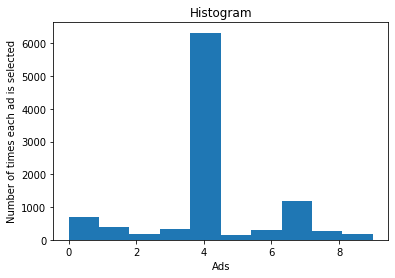

In [4]:
plt.hist(ads_selected)
plt.title('Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()